In [1]:
import pandas as pd
import os

In [3]:

data=pd.read_csv(r"C:\Users\ASUS\Desktop\Avtaar\sales_full_data.csv")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
data=data.dropna(how='all')
data= data[data['Order Date'].str[0:2]!='Or']

# add month
data['Month'] = data['Order Date'].str[0:2]
data['Month'] = data['Month'].astype('int32')

# conver  qunt order and price to numeric
data['Quantity Ordered']= pd.to_numeric(data['Quantity Ordered'])
data['Price Each']= pd.to_numeric(data['Price Each'])

# add sale column
data['sale']  = data['Quantity Ordered']*data['Price Each']
data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sale
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [5]:
data.groupby('Month').sum()

,Quantity Ordered,Price Each,sale
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


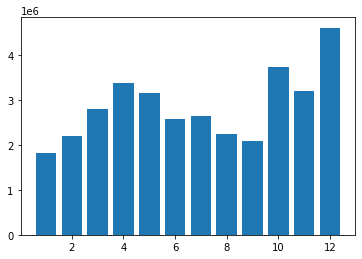

In [6]:
import matplotlib.pyplot as plt

months= range(1,13) # x-axis
result =data.groupby('Month').sum()

plt.bar(months,result['sale'])
plt.show()

In [7]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sale
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [8]:
#creat new column for DATE-time-obejct DTO
data['DTO'] =pd.to_datetime(data['Order Date'])
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sale,DTO
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,2019-04-19 08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,2019-04-07 22:30:00
3,176560,Google Phone,1,600.00,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,2019-04-12 14:38:00
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,2019-04-12 14:38:00
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,2019-04-30 09:27:00


In [9]:
# Extract hour
data['Hour']= data['DTO'].dt.hour
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sale,DTO,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,2019-04-19 08:46:00,8
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,2019-04-07 22:30:00,22
3,176560,Google Phone,1,600.00,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,2019-04-12 14:38:00,14
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,2019-04-12 14:38:00,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,2019-04-30 09:27:00,9


In [10]:
# group data by the hour and counting all order
result2=data.groupby(['Hour']).count()
result2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sale,DTO
Hour,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256


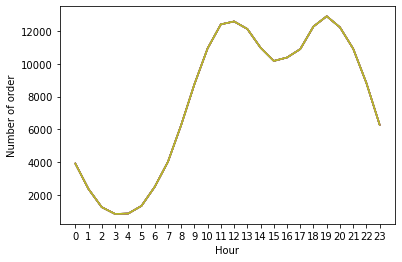

In [11]:
# draw line chart
result2=data.groupby(['Hour']).count()
hours= [hour for hour, df in data.groupby('Hour')]

plt.plot(hours,result2)
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of order')

plt.show()

In [23]:
#What product are sold most
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sale,DTO,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,2019-04-19 08:46:00,8
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,2019-04-07 22:30:00,22
3,176560,Google Phone,1,600.00,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,2019-04-12 14:38:00,14
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,2019-04-12 14:38:00,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,2019-04-30 09:27:00,9


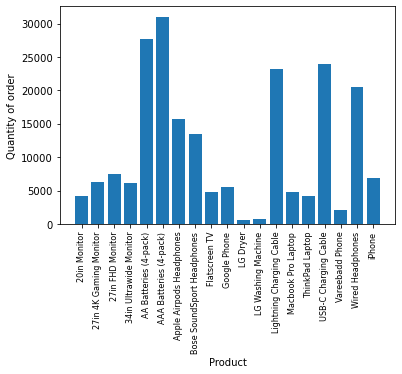

In [33]:
group_product=data.groupby('Product')
quantity= group_product.sum()['Quantity Ordered']
products = [product for product, df in group_product]

plt.bar(products,quantity)
plt.ylabel('Quantity of order')
plt.xlabel('Product')
plt.xticks(products,rotation="vertical",size=8)
plt.show()


In [ ]:
#ANSWER 1= Best mont of sale is " DECEMBER" and Lowest " January"

In [ ]:
# answer 2= while most of the sale is at 12PM and 7 PM so we sould we display 
# advertisemnts before that time it may be 20 or 30 minute before 12pm or 7pm

In [ ]:
#ANswer 3= AAA Batteries(4 pack) is most sold product